<a href="https://colab.research.google.com/github/TavleenGill/House-Price-Prediction/blob/main/House_Price_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
test=pd.read_csv("test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
test.shape

(1459, 80)

In [4]:
var=test.isnull().sum()
print(var.to_string())

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [5]:
# Alley, poolQC, Fence, MiscFeature has more than 50% missing vakues ===> Dropping
# ID is not needed thus dropping it

In [6]:
## Fill missing values
test['LotFrontage']=test['LotFrontage'].fillna(test['LotFrontage'].mean())
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['FireplaceQu']=test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageQual']=test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond']=test['GarageCond'].fillna(test['GarageCond'].mode()[0])
test['GarageFinish']=test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageType']=test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageCars']=test['GarageCars'].fillna(test['GarageCars'].mode()[0])
test['BsmtQual']=test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])
test['BsmtCond']=test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtExposure']=test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1']=test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mode()[0])
test['BsmtFinType2']=test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].mode()[0])
test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mode()[0])
test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mode()[0])
test['BsmtFullBath']=test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0])
test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0])
test['KitchenQual']=test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Functional']=test['Functional'].fillna(test['Functional'].mode()[0])
test['SaleType']=test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Utilities']=test['Utilities'].fillna(test['Utilities'].mode()[0])
test['Exterior1st']=test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd']=test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['MasVnrType']=test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])
test['MasVnrArea']=test['MasVnrArea'].fillna(test['MasVnrArea'].mode()[0])

In [7]:
test['GarageYrBlt']=test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean()).astype(int)

In [8]:
#Dropping values

test.drop(['Id','Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

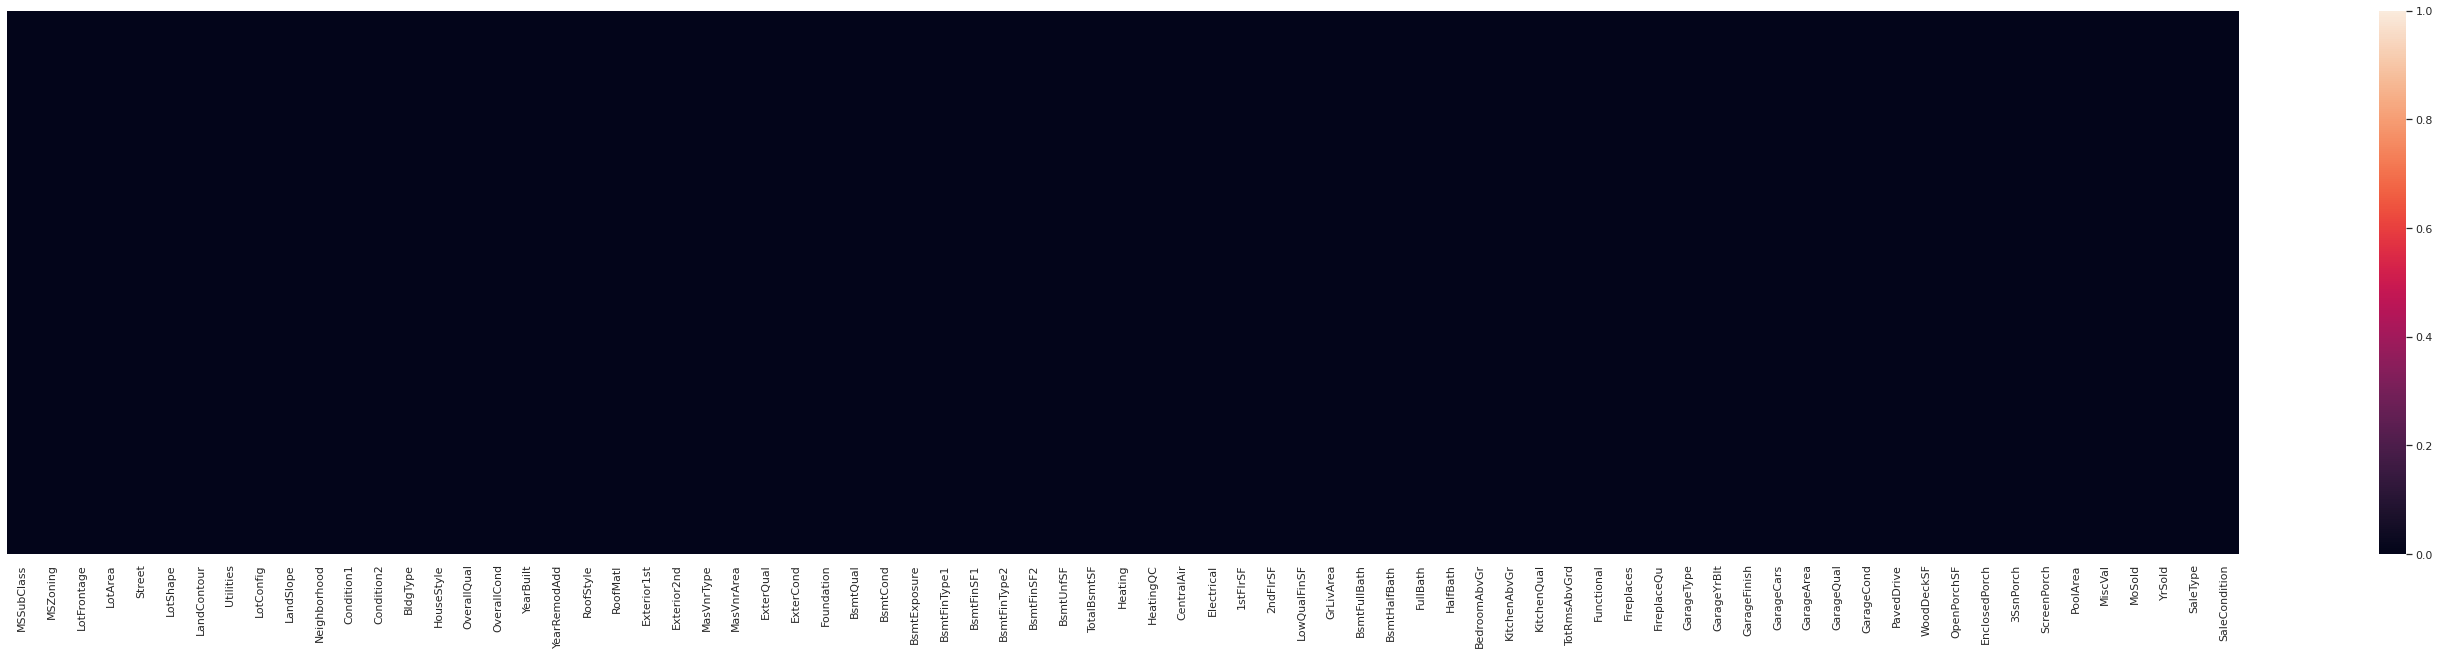

In [9]:
sns.set(rc={'figure.figsize':(50,10)})
sns.heatmap(test.isnull(),xticklabels=True,yticklabels=False)

In [10]:
test.shape

(1459, 75)

In [11]:
test.to_csv('formulated.csv',index=False)

#test.info()